# Classification Analysis - 1 - KNN Classification, Decision Tree Classification, Logistic Regression

## Import libraries and load dataset

In [6]:
# DataFrame Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# KNN Classifier Imports
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# DTC Imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

# Logistic Regression Imports
from sklearn.linear_model import LogisticRegression

In [7]:
# Load presaved dataset from seaborn

gsr = sns.load_dataset("geyser")

In [8]:
gsr

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


## EDA

In [9]:
gsr.shape

(272, 3)

In [10]:
# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder on 'Outlet_Size' 
gsr['kind'] = labelencoder.fit_transform(gsr.kind)

# display 5 observations
gsr.sample(5)

,duration,waiting,kind
179,4.167,74,0
270,1.817,46,1
150,5.033,77,0
30,4.300,73,0
89,4.000,86,0


In [11]:
gsr.head()

,duration,waiting,kind
0,3.600,79,0
1,1.800,54,1
2,3.333,74,0
3,2.283,62,1
4,4.533,85,0


In [12]:
gsr.tail()

,duration,waiting,kind
267,4.117,81,0
268,2.150,46,1
269,4.417,90,0
270,1.817,46,1
271,4.467,74,0


In [13]:
gsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.4 KB


## Data Visualizations

Let's `visualise` the data to understand it better.

### Plotting Pair-plot

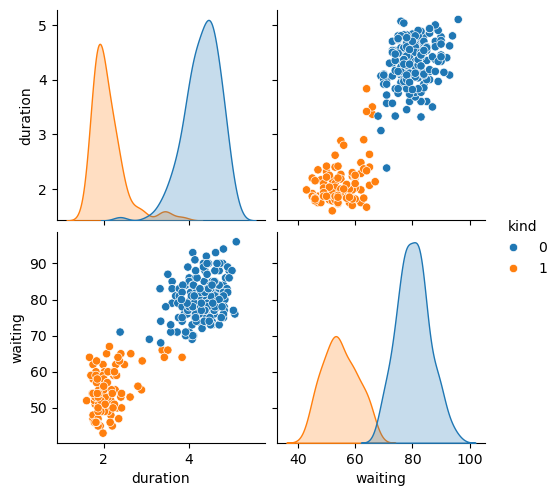

In [14]:
# Pair plot
sns.pairplot(gsr, hue='kind')
plt.show()

## Missing Value Treatment

### Let's check for missing values

In [15]:
gsr.isnull().values.any()

False

In [16]:
missing_values = gsr.isnull().sum()
missing_values

duration    0
waiting     0
kind        0
dtype: int64

Let's plot a `heatmap` of missing values too to verify this.

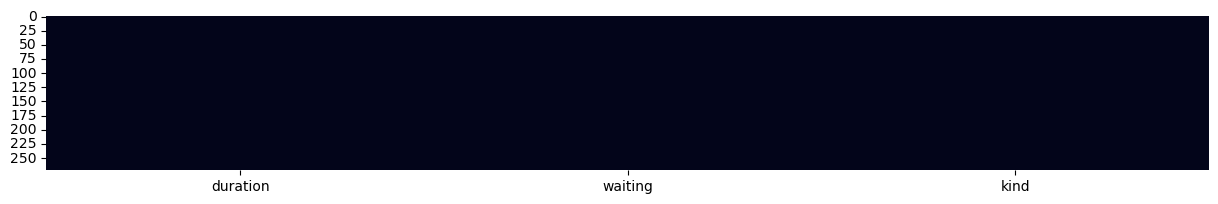

In [17]:
# set the figure size
plt.rcParams["figure.figsize"]=[15,2]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(gsr.isnull(), cbar = False)

# display the plot
plt.show()

***We have ensured that there are no missing values in the dataset.***

## Outlier Treatment

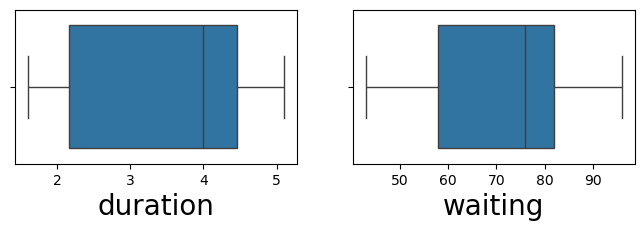

In [18]:
# let's first plot the outliers.
variables = ['duration', 'waiting']
fig, ax = plt.subplots(1, 2, figsize=(8, 2))

for variable, subplot in zip(gsr[variables], ax.flatten()):
    z = sns.boxplot(x=gsr[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)
plt.show()

**We can observe that there are no outliers in the data.**

In [19]:
# select the target variable
Y = gsr['kind']

# select all the independent variables
# by dropping the target variable
X = gsr.drop(['kind'], axis = 1)

## Scaling

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1
0,0.571429,0.679245
1,0.057143,0.207547
2,0.495143,0.584906
3,0.195143,0.358491
4,0.838000,0.792453
...,...,...
267,0.719143,0.716981
268,0.157143,0.056604
269,0.804857,0.886792
270,0.062000,0.056604


## Train and Test Split

In [21]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state=197)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",y_train.shape)

# print the shape of 'y_test'
print("Y_test ",y_test.shape)

X_train  (190, 2)
X_test  (82, 2)
Y_train  (190,)
Y_test  (82,)


## KNN Classification

In [22]:
# Train the model with different K values and plot MAPE scores
k_values = np.arange(1,100,5)

Best k value: 1


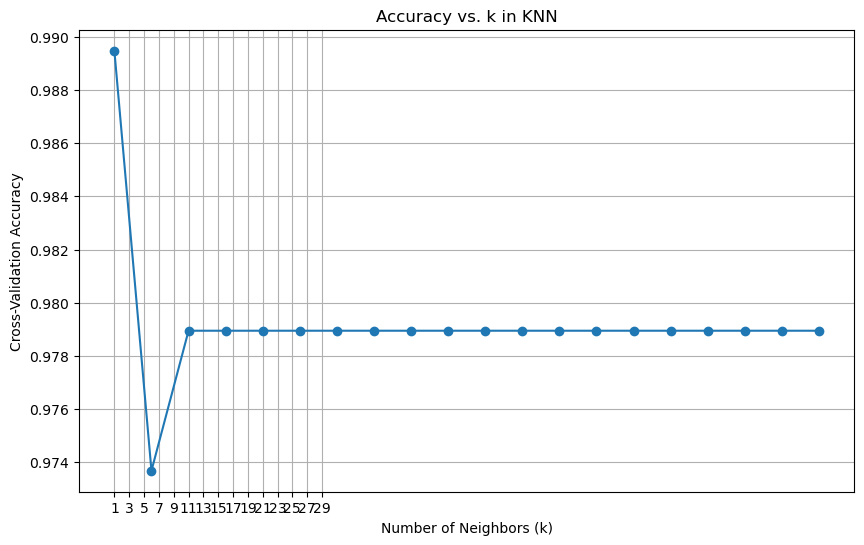

In [23]:
cv_scores = []          # List to hold cross-validation scores

# Find the best k value using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  # 10-fold cross-validation
    cv_scores.append(scores.mean())  # Mean accuracy for each k

# Determine the optimal k (the one with the highest accuracy)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k value: {best_k}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.xticks(np.arange(1, 31, step=2))
plt.grid(True)
plt.show()

#### The more the Cross-Validation Accuracy, the better, since, 1 is too less and might result in overfit, let's take k = 10, as the value of CV = 0.979 is good too.

In [24]:
K = 10
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)  # Fit the model

# Set initial threshold
threshold = 0.98

# Predict probabilities for the training set
train_proba = model.predict_proba(X_train)[:, 1]
print(model.predict_proba(X_train))

[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.1 0.9]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.9 0.1]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]

Train proba: [0.  0.  0.  0.  1.  1.  0.8 1.  1.  0.  1.  0.  1.  1.  0.  0.4 0.  0.
 0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.1 1.  0.  0.
 1.  0.4 0.  0.  0.  0.  0.  0.  0.9 1.  0.  0.  0.  1.  1.  0.  1.  0.
 0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.1
 0.  1.  1.  0.  1.  1.  0.4 0.  0.  0.  1.  0.  1.  0.  0.1 1.  1.  1.
 1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.
 0.  0.  0.  1.  1.  1.  1.  0.8 1.  0.  0.  1.  0.8 1.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.3 1.  0.  1.  0.  0.  0.
 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.
 0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.3 0.2 0.  0.  0.  1.
 0.  1.  0.  0.  0.  0.  0.  0.  0.  1. ]
Confusion Matrix:
 [[48  0]
 [ 2 32]]


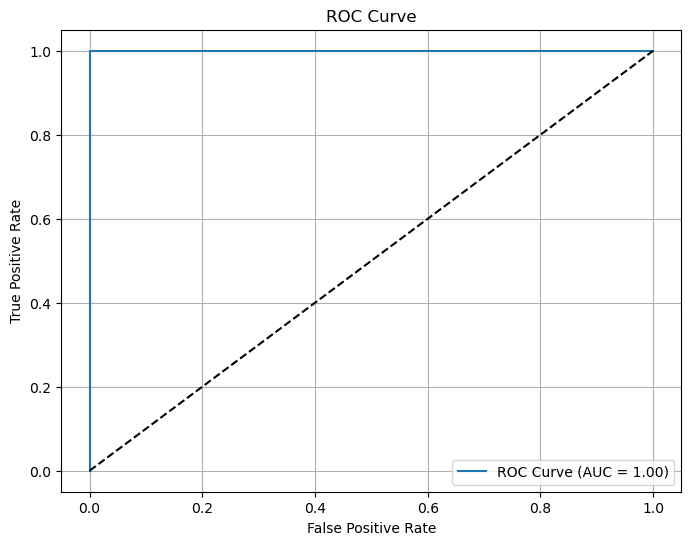

Best Threshold: 0.4
Confusion Matrix with Best Threshold:
 [[48  0]
 [ 0 34]]


In [25]:
print("Train proba:", train_proba)

# Predict classes based on the threshold for training set
y_train_pred = (train_proba >= threshold).astype(int)

# Similarly, predict probabilities for the test set
test_proba = model.predict_proba(X_test)[:, 1]

# Predict classes based on the threshold for test set
y_test_pred = (test_proba >= threshold).astype(int)

# Confusion matrix for test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Initialize lists to store TPR, FPR, and thresholds
fprs, tprs, thresholds = roc_curve(y_test, test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(fprs, tprs)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
best_threshold_index = np.argmax(tprs - fprs)
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)

# Predict using the best threshold
y_test_best_pred = (test_proba >= best_threshold).astype(int)
best_conf_matrix = confusion_matrix(y_test, y_test_best_pred)

print("Confusion Matrix with Best Threshold:\n", best_conf_matrix)

**Inference:** We can observe that AUC = 1 and this is a perfect model.

## Decision Tree Classification

In [26]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [27]:
dtc = clf.fit(X,Y)

In [28]:
# feature importance
pd.DataFrame({'features':dtc.feature_names_in_, 'importance':dtc.feature_importances_})

,features,importance
0,duration,0.0
1,waiting,1.0


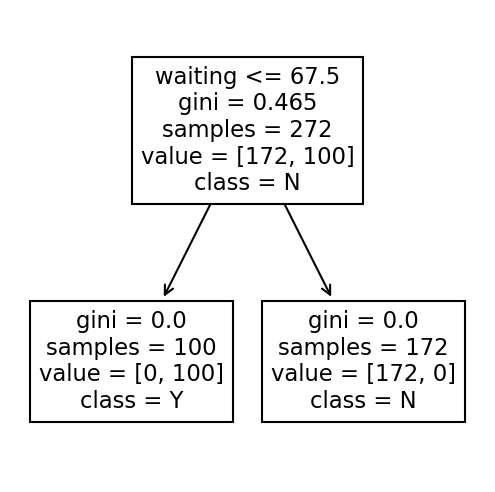

In [29]:
plt.figure(figsize=(4,4), dpi=150)
plot_tree(dtc, feature_names=X.columns, class_names=['N','Y']);

In [30]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
model = clf.fit(X,Y)

In [31]:
threshold = 0.99
yhat = []
for i in model.predict_proba(X)[:,1]:
    if i > threshold:
        yhat.append(1)
    else:
        yhat.append(0)
print(yhat)

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]


In [32]:
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,duration,0.0
1,waiting,1.0


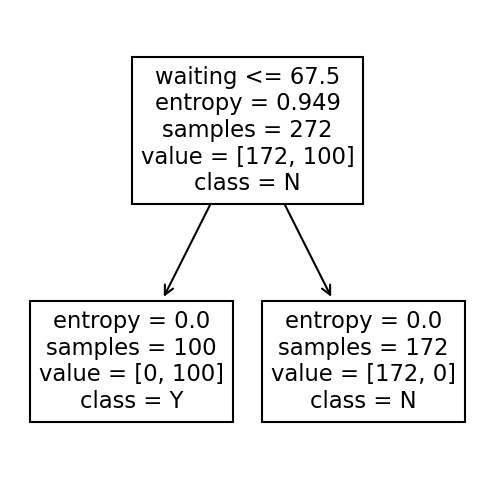

In [33]:
plt.figure(figsize=(4,4), dpi=150)
plot_tree(model, feature_names=X.columns, class_names=['N','Y']);

**Inference:** We can obseve from both Gini and Entropy methods that variable, `waiting`, only has an impact on label, `kind` and the other feature, `duration` does not impact the label, `kind`, so, in the first split itself, the labels are classified.

## Logistic Regression

In [34]:
lr = LogisticRegression()
lr.fit(X, Y)

LogisticRegression()

In [35]:
# Predict probabilities and add to dataframe
gsr['prob'] = model.predict_proba(X)[:, 1]
gsr['prob']

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
267    0.0
268    1.0
269    0.0
270    1.0
271    0.0
Name: prob, Length: 272, dtype: float64

In [36]:
# Initialize empty dataframe to store metrics
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [37]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (gsr['prob'] > threshold).astype(int)
    cm = confusion_matrix(Y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR, 'auc_score':roc_auc_score(Y,y_pred)})

In [38]:
# Compute AUC
auc = roc_auc_score(Y, gsr['prob'])

In [39]:
# Print ROC curve and AUC
print(df_ROC)
print('AUC:', auc)

    Threshold     TP     TN   FP     FN  TPR  FPR
0         0.0  100.0  172.0  0.0    0.0  1.0  0.0
1         0.1  100.0  172.0  0.0    0.0  1.0  0.0
2         0.2  100.0  172.0  0.0    0.0  1.0  0.0
3         0.3  100.0  172.0  0.0    0.0  1.0  0.0
4         0.4  100.0  172.0  0.0    0.0  1.0  0.0
5         0.5  100.0  172.0  0.0    0.0  1.0  0.0
6         0.6  100.0  172.0  0.0    0.0  1.0  0.0
7         0.7  100.0  172.0  0.0    0.0  1.0  0.0
8         0.8  100.0  172.0  0.0    0.0  1.0  0.0
9         0.9  100.0  172.0  0.0    0.0  1.0  0.0
10        1.0    0.0  172.0  0.0  100.0  0.0  0.0
AUC: 1.0


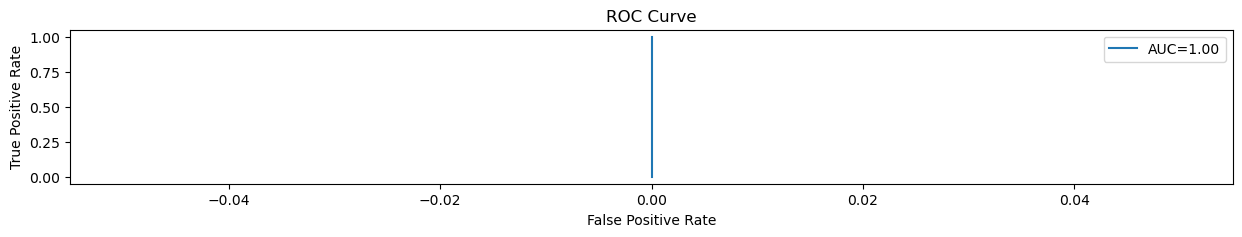

In [40]:
# Plot ROC curve from df_ROC
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**We can infer that the number FPR is 0, indicating there are no false positives predicted by the model, AUC = 1, TPR = 1, indicating that it is a perfect model.**